# Библиотеки

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Задание 1

Разрешение изображения:  (256, 256)
Формат изображения: <class 'numpy.ndarray'>
Формат пикселей: float32


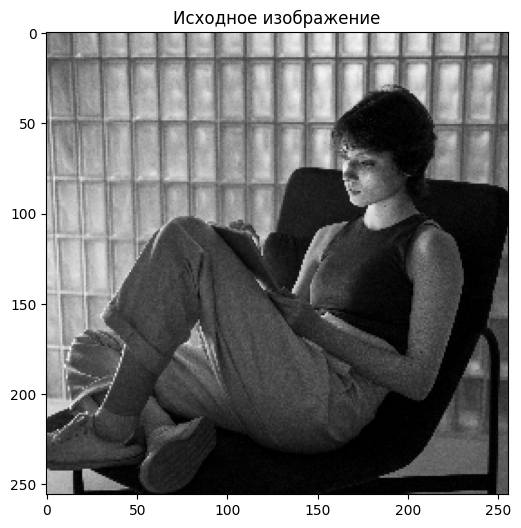

In [33]:
image = plt.imread("girl.png")

if len(image.shape) == 3:
    image = np.mean(image, axis=2)

plt.figure(figsize=(12,6))
print("Разрешение изображения: ", image.shape)
print(f'Формат изображения: {type(image)}')
print(f'Формат пикселей: {image.dtype}')
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.show()

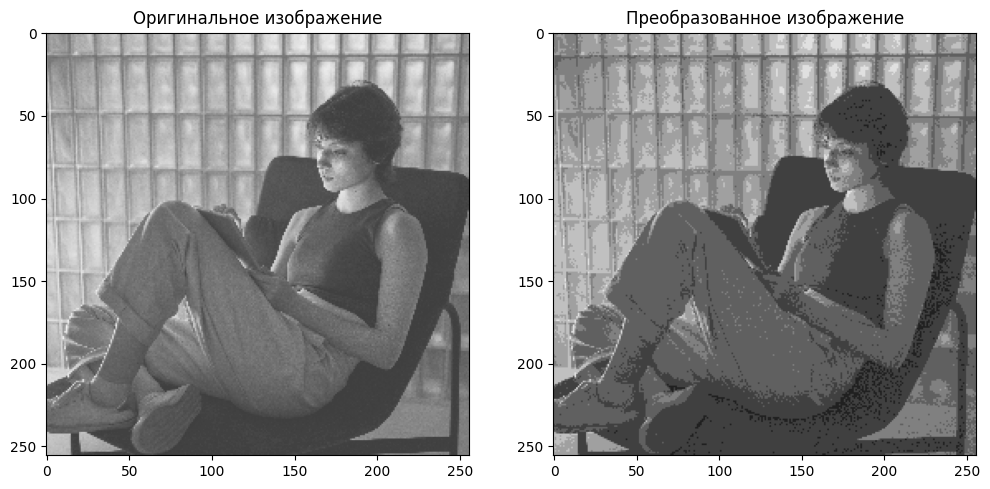

In [34]:
if image.dtype != np.uint8:
    image = (image * 255).astype(np.uint8)

new_img = (image >> 5 ) << 5

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title('Оригинальное изображение')

plt.subplot(1,2,2)
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)
plt.title('Преобразованное изображение')
plt.show()

# Задание 2

In [2]:
def bilinear(image: list, x: float, y:float):
    height, width = image.shape
    
    l = int(np.floor(x))
    k = int(np.floor(y)) 

    if l >= width - 1:
        l = np.clip(l, 0, width - 2)
    if k >= height - 1:
        k = np.clip(k, 0, height - 2)
    
    
    if width <= 1 or height <= 1:
        return image[k, l]

    
    a = x - l  
    b = y - k  
    
    f_l_k = image[k, l]          
    f_l1_k = image[k, l + 1]     
    f_l_k1 = image[k + 1, l]      
    f_l1_k1 = image[k + 1, l + 1] 
    
    result = (1 - a) * (1 - b) * f_l_k + a * (1 - b) * f_l1_k + (1 - a) * b * f_l_k1 + a * b * f_l1_k1
    return result

(32, 32)
Разрешение изображения:  (32, 32)
Формат изображения: <class 'numpy.ndarray'>
Формат пикселей: float64


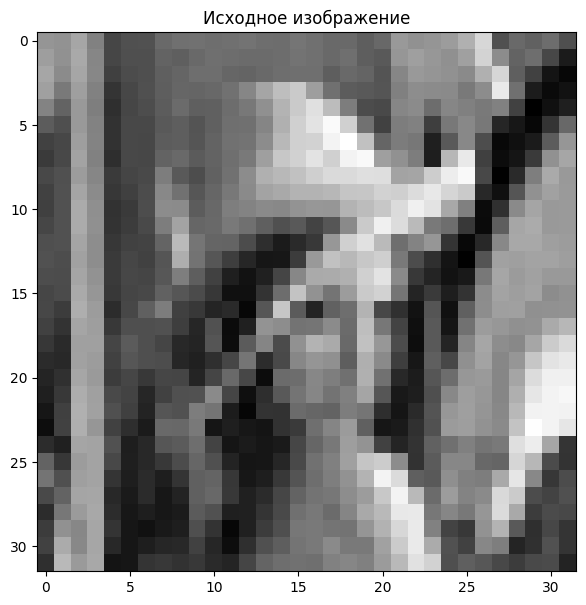

In [22]:
pic = plt.imread("lena.jpg")

if len(pic.shape) == 3: 
        pic = np.mean(pic, axis=2)
print(pic.shape)

print("Разрешение изображения: ", pic.shape)
print(f'Формат изображения: {type(pic)}')
print(f'Формат пикселей: {pic.dtype}')

plt.figure(figsize=(12,7))
plt.imshow(pic, cmap='gray')
plt.title("Исходное изображение")
plt.show()

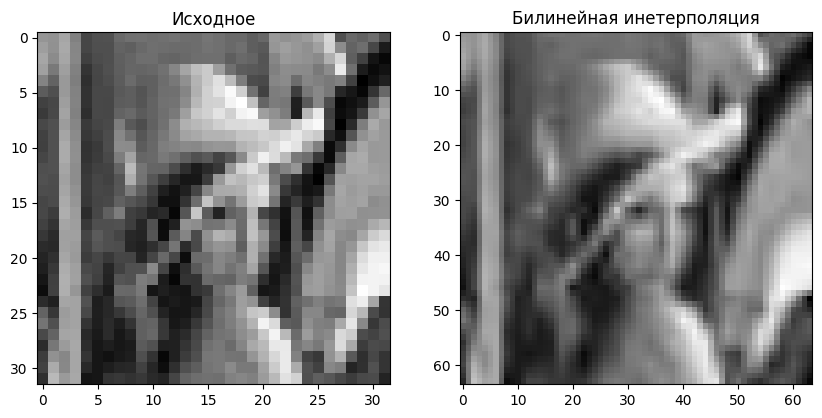

In [23]:
scale_factor = 0.5 
new_height = int(pic.shape[0] / scale_factor)
new_width = int(pic.shape[1] / scale_factor)

new_image = np.zeros((new_height, new_width))

for y_new in range(new_height):
    for x_new in range(new_width):
        x_old = x_new * scale_factor
        y_old = y_new * scale_factor
        new_image[y_new, x_new] = bilinear(pic, x_old, y_old)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Исходное")
plt.imshow(pic, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Билинейная инетерполяция")
plt.imshow(new_image, cmap='gray')
plt.show()

# Доп

Разрешение изображения:  (256, 256)
Формат изображения: <class 'numpy.ndarray'>
Формат пикселей: float32


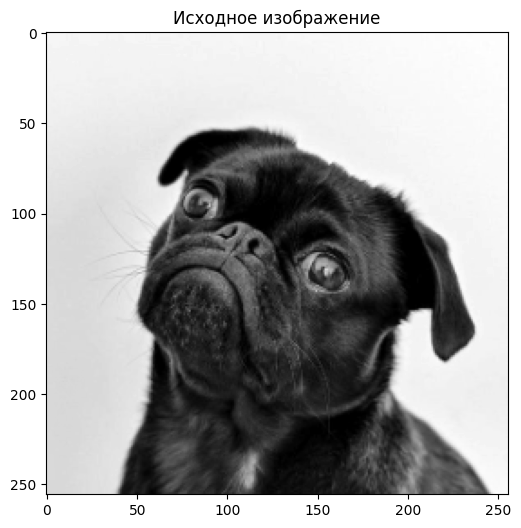

In [17]:
img_dog = plt.imread("dog.png")

if len(img_dog.shape) == 3:
    img_dog = np.mean(img_dog, axis=2)

plt.figure(figsize=(12,6))
print("Разрешение изображения: ", img_dog.shape)
print(f'Формат изображения: {type(img_dog)}')
print(f'Формат пикселей: {img_dog.dtype}')
plt.imshow(img_dog, cmap='gray')
plt.title("Исходное изображение")
plt.show()

In [36]:
if img_dog.dtype != np.uint8:
    img_dog = (img_dog * 255).astype(np.uint8)

new_height = img_dog.shape[0]//4
weight_part = img_dog.shape[1]

part_1 = img_dog[:new_height, :]
part_2 = img_dog[new_height: new_height*2, :]
part_3 = img_dog[ new_height*2:new_height*3 ,:]
part_4 = img_dog[ new_height*3:new_height*4 ,:]

In [37]:
swapped_img = np.vstack([part_4, part_3, part_2, part_1])

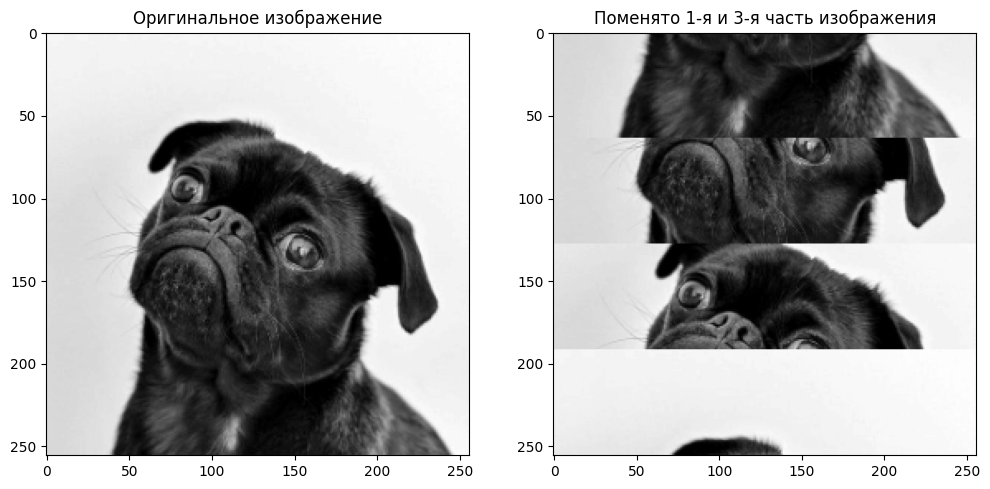

In [38]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(img_dog,cmap='gray')
plt.title('Оригинальное изображение')

plt.subplot(1,2,2)
plt.imshow(swapped_img, cmap='gray')
plt.title('Поменято 1-я и 3-я часть изображения')
plt.show()